          x         y
h                    
0  1.000000  0.000000
1  0.500000  0.000000
2  0.450000 -0.100000
3  0.305000 -0.070000
4  0.228500 -0.089000
5  0.157450 -0.069300
6  0.110565 -0.063410
7  0.074091 -0.049217
8  0.049315 -0.039923


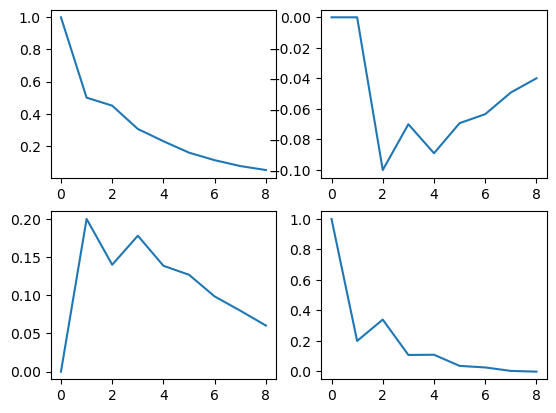

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def impulse_response(A:dict[pd.DataFrame], shock, h:int)->pd.DataFrame:
    p = len(A)
    irs = pd.DataFrame(np.zeros((h+1+p,A[1].shape[0])),
                       columns = A[1].index,
                       index = range(-p,h+1))
    irs.index.name = 'h'
    for ih in range(h+1):
        if ih == 0:
            irs.loc[ih] = np.sum([A[i]@irs.loc[ih-i].values for i in range(1,p+1)],axis=0)+shock
        else:
            irs.loc[ih] = np.sum([A[i]@irs.loc[ih-i].values for i in range(1,p+1)],axis=0)
    irs = irs.loc[0:]
    return irs

 

A = {1: pd.DataFrame([[0.5,0.2],
                      [0,0.2]], columns = ['x.shift(1)','y.shift(1)'], index = ['x','y']),
     2: pd.DataFrame([[0.2,0],

                      [-0.1,0.3]], columns = ['x.shift(2)','y.shift(2)'], index = ['x','y'])}
u = [0,1]



h=8
shock_x = [1,0]
irf_x = impulse_response(A,shock_x,h)

print(irf_x)
shock_y = [0,1]
irf_y = impulse_response(A,shock_y,h)
fig,ax=plt.subplots(nrows=2,ncols=2)
ax[0,0].plot(irf_x['x'])
ax[0,1].plot(irf_x['y'])
ax[1,0].plot(irf_y['x'])
ax[1,1].plot(irf_y['y'])
plt.show()


In [34]:
A1 = np.array([[1,1],[1,1]])
A2 = np.array([[10,10], [10,10]])
A = np.array([A1, A2])

x1 = np.atleast_2d([3,4]).T
x2 = np.atleast_2d([1,1]).T
x = np.array([x1,x2])

print(A)
print(x)
print("----")
print(np.dot(A,x))

[[[ 1  1]
  [ 1  1]]

 [[10 10]
  [10 10]]]
[[[3]
  [4]]

 [[1]
  [1]]]
----
[[[[ 7]
   [ 2]]

  [[ 7]
   [ 2]]]


 [[[70]
   [20]]

  [[70]
   [20]]]]
